# 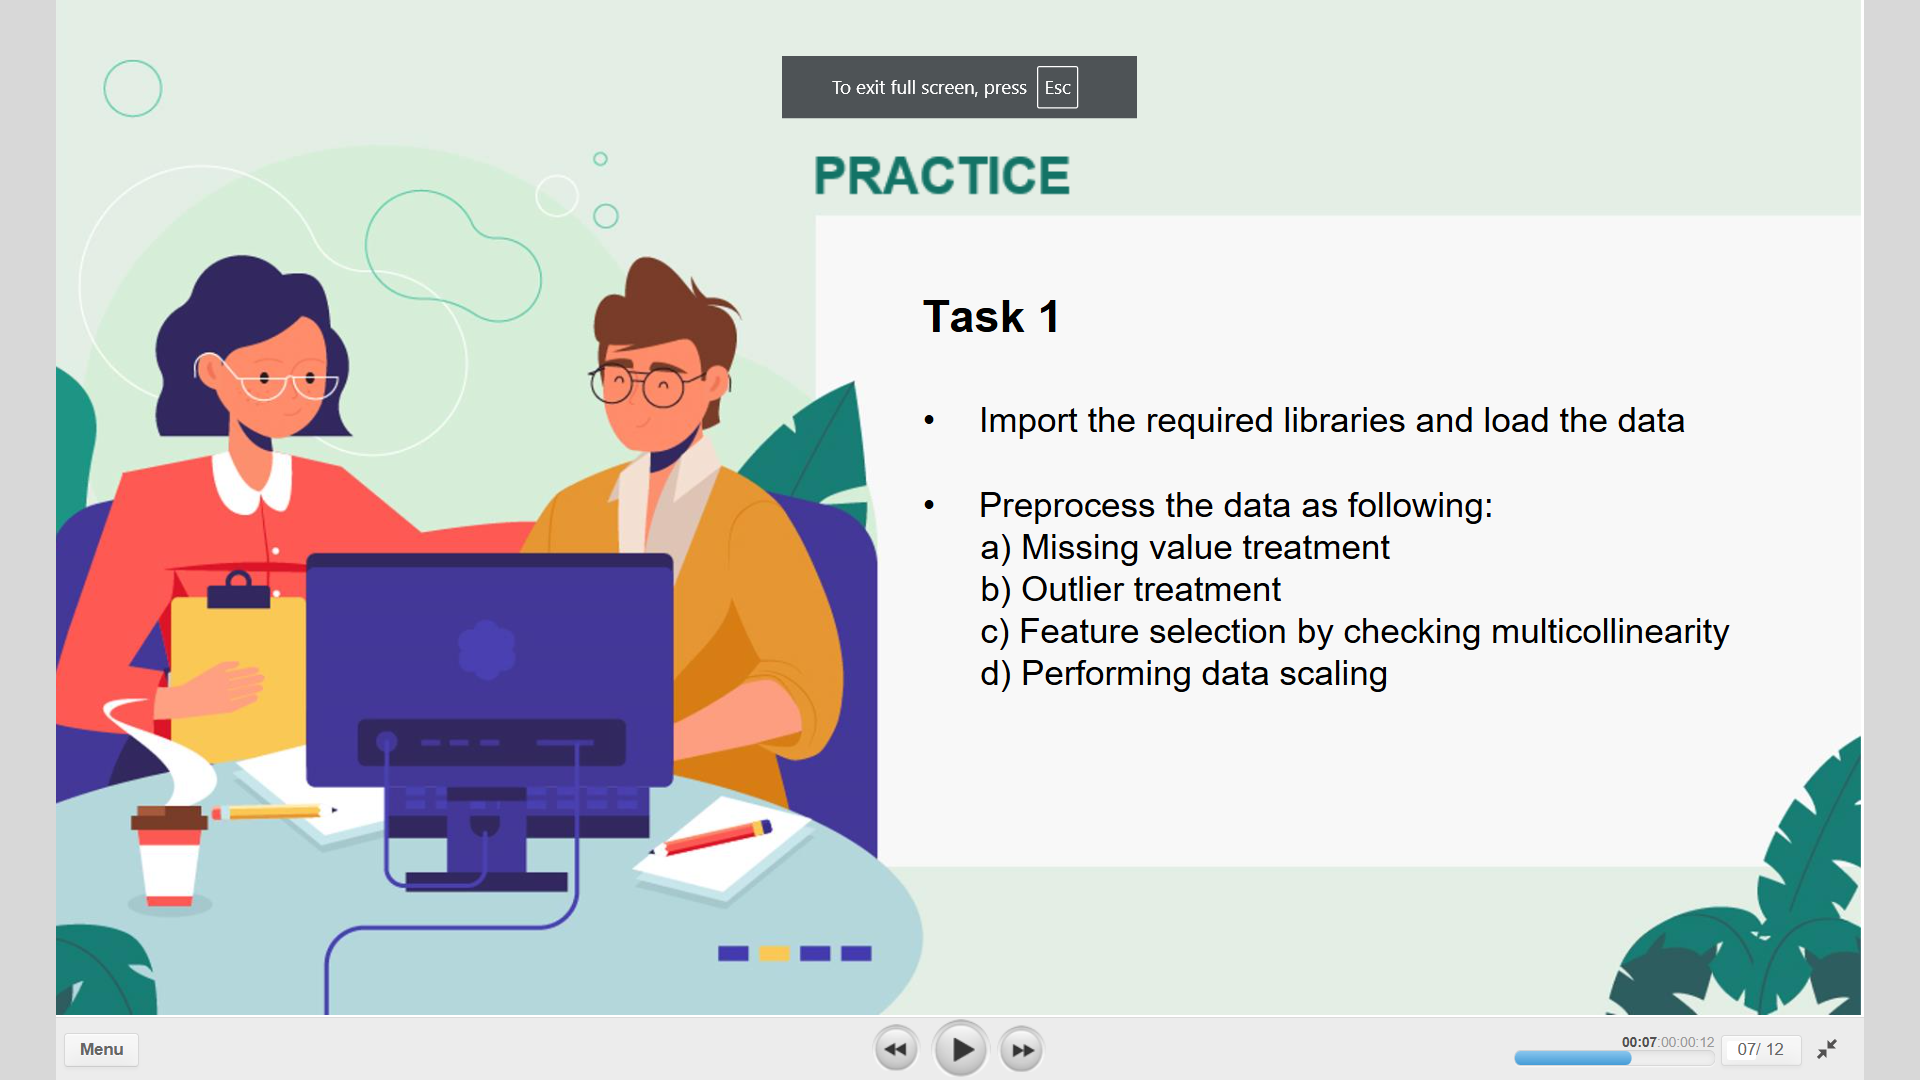

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [72]:
pv=pd.read_csv('DS1_C9_S6_Practice_Vehicle_Data.csv')
pv

Manufacturer    Model Vehicle_type  Engine_size  Horsepower  Wheelbase  \
0          Acura  Integra    Passenger          1.8       140.0      101.2   
1          Acura       TL    Passenger          3.2       225.0      108.1   
2          Acura       CL    Passenger          3.2       225.0      106.9   
3          Acura       RL    Passenger          3.5       210.0      114.6   
4           Audi       A4    Passenger          1.8       150.0      102.6   
..           ...      ...          ...          ...         ...        ...   
152        Volvo      V40    Passenger          1.9       160.0      100.5   
153        Volvo      S70    Passenger          2.4       168.0      104.9   
154        Volvo      V70    Passenger          2.4       168.0      104.9   
155        Volvo      C70    Passenger          2.3       236.0      104.9   
156        Volvo      S80    Passenger          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0    02-02-2012   
1     70.3   192.9        3.517           17.2             25.0    06-03-2011   
2     70.6   192.0        3.470           17.2             26.0    01-04-2012   
3     71.4   196.6        3.850           18.0             22.0    03-10-2011   
4     68.2   178.0        2.998           16.4             27.0    10-08-2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 13 columns]

In [73]:
# preprocessing the data

In [74]:
pv.shape

(157, 13)

In [75]:
# missing value treatment 
pv.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Latest_Launch        0
Power_perf_factor    2
dtype: int64

In [76]:
pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       157 non-null    object 
 1   Model              157 non-null    object 
 2   Vehicle_type       157 non-null    object 
 3   Engine_size        156 non-null    float64
 4   Horsepower         156 non-null    float64
 5   Wheelbase          156 non-null    float64
 6   Width              156 non-null    float64
 7   Length             156 non-null    float64
 8   Curb_weight        155 non-null    float64
 9   Fuel_capacity      156 non-null    float64
 10  Fuel_efficiency    154 non-null    float64
 11  Latest_Launch      157 non-null    object 
 12  Power_perf_factor  155 non-null    float64
dtypes: float64(9), object(4)
memory usage: 16.1+ KB


In [77]:
pv.select_dtypes(include='object').isnull().sum()

Manufacturer     0
Model            0
Vehicle_type     0
Latest_Launch    0
dtype: int64

In [78]:
from sklearn import preprocessing

In [79]:
pv_encoder=preprocessing.LabelEncoder()

In [80]:
for x in pv.select_dtypes(include='object'):
    pv_encoder.fit(pv[x])
    pv[f'{x}_enc']=pv_encoder.transform(pv[x])

In [81]:
t=pv.select_dtypes(exclude='object')
for x in t:
    pv[x].fillna(pv[x].mean(),inplace=True)
    

In [82]:
pv.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Latest_Launch        0
Power_perf_factor    0
Manufacturer_enc     0
Model_enc            0
Vehicle_type_enc     0
Latest_Launch_enc    0
dtype: int64

# outlier treatment 

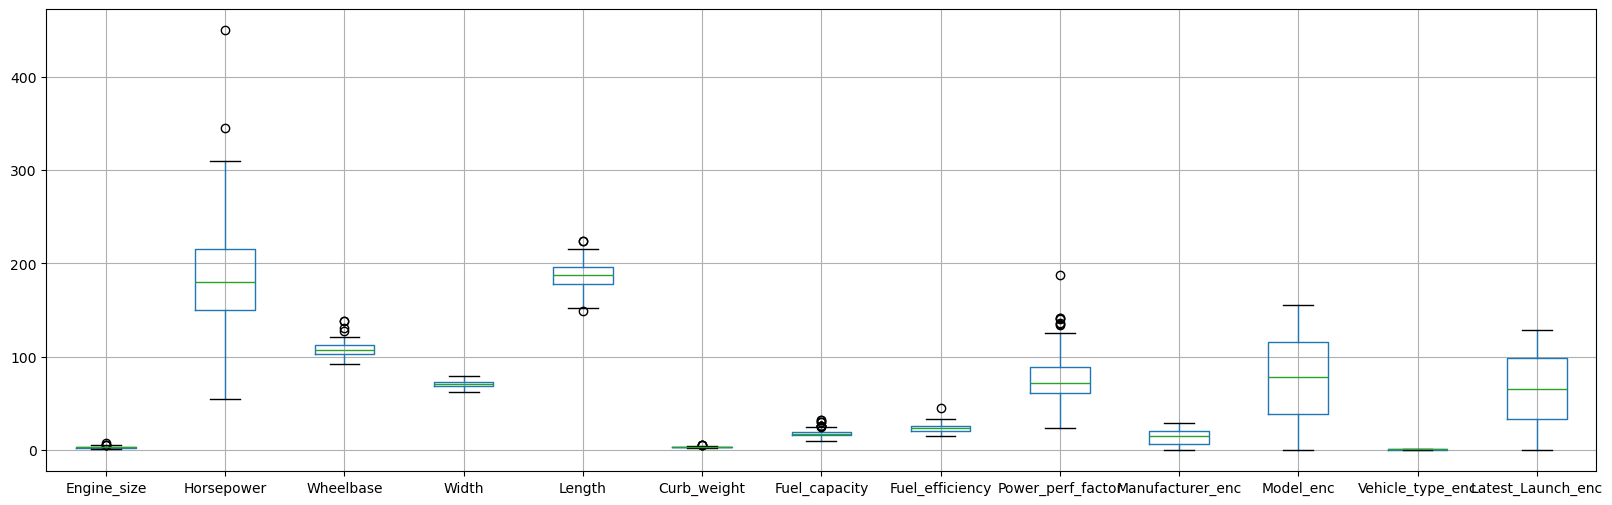

In [84]:
pv.boxplot()
plt.gcf().set_size_inches(20,6)
plt.show()

In [85]:
def iqr_winzorization(df,thresh=1.5):
    df_out=df.copy()
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        q1=df_out[col].quantile(0.25)
        q3=df_out[col].quantile(0.75)
        iqr=q3-q1
        lower_fence=q1-thresh*iqr
        upper_fence=q3+thresh*iqr
        df_out.loc[df_out[col]<lower_fence,col]=lower_fence
        df_out.loc[df_out[col]>upper_fence,col]=upper_fence
    return df_out
df=pd.DataFrame(pv.select_dtypes(exclude='object'))
pv_df=iqr_winzorization(df.copy())


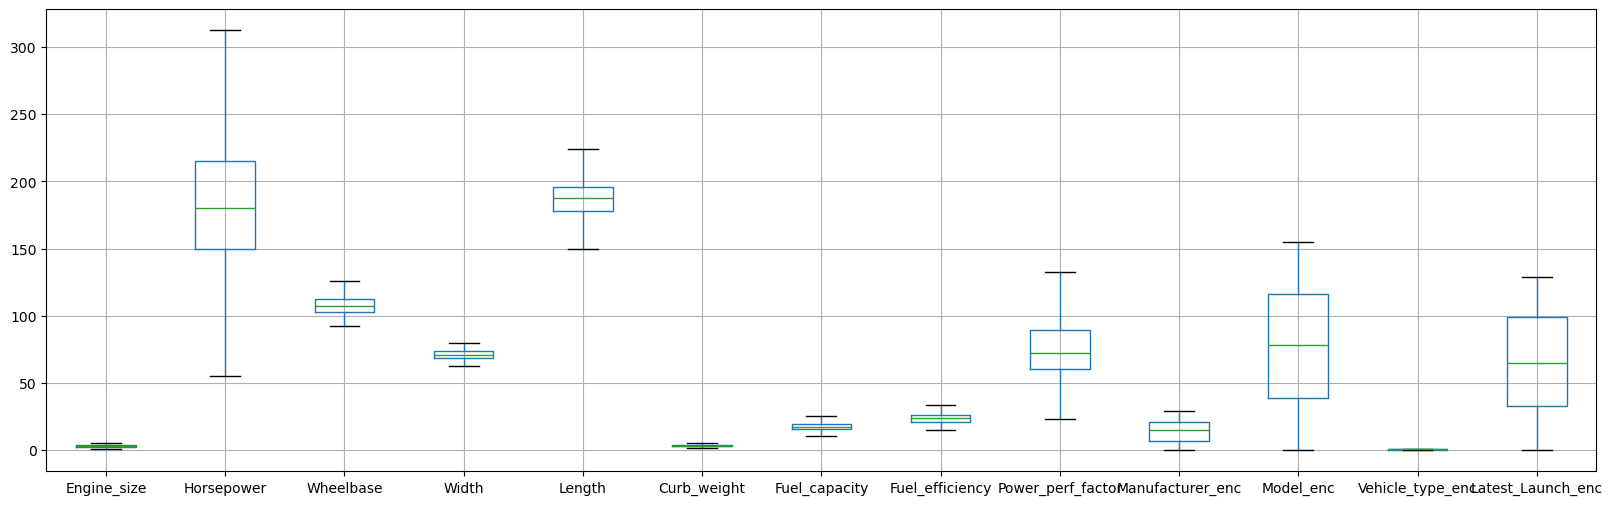

In [86]:
pv_df.boxplot()
plt.gcf().set_size_inches(20,6)
plt.show()

In [87]:
pv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Engine_size        157 non-null    float64
 1   Horsepower         157 non-null    float64
 2   Wheelbase          157 non-null    float64
 3   Width              157 non-null    float64
 4   Length             157 non-null    float64
 5   Curb_weight        157 non-null    float64
 6   Fuel_capacity      157 non-null    float64
 7   Fuel_efficiency    157 non-null    float64
 8   Power_perf_factor  157 non-null    float64
 9   Manufacturer_enc   157 non-null    int32  
 10  Model_enc          157 non-null    float64
 11  Vehicle_type_enc   157 non-null    float64
 12  Latest_Launch_enc  157 non-null    int32  
dtypes: float64(11), int32(2)
memory usage: 14.8 KB


# Perform data scaling 

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
cols=pv_df.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(pv_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

Engine_size  Horsepower  Wheelbase     Width    Length  Curb_weight  \
0    -1.286724   -0.852221  -0.878521 -1.122510 -1.121607    -1.226153   
1     0.168414    0.762340   0.117309 -0.247827  0.417403     0.250315   
2     0.168414    0.762340  -0.055879 -0.160359  0.349837     0.171279   
3     0.480229    0.477418   1.055409  0.072890  0.695176     0.810297   
4    -1.286724   -0.662272  -0.676468 -0.860105 -0.701195    -0.622449   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  Manufacturer_enc  \
0      -1.351619         1.070331          -0.786032         -1.694221   
1      -0.170495         0.311068           0.643092         -1.694221   
2      -0.170495         0.564156           0.024327         -1.694221   
3       0.065729        -0.448195           0.643913         -1.694221   
4      -0.406720         0.817243          -0.591793         -1.577506   

   Model_enc  Vehicle_type_enc  Latest_Launch_enc  
0   0.029623          0.594515          -1.646086  
1   1.453800          0.594515          -1.229967  
2  -1.172026          0.594515          -1.698100  
3   0.830723          0.594515          -1.464034  
4  -1.550323          0.594515          -0.397731

# feature selection by selecting multicolinearity 

In [92]:
import seaborn as sns

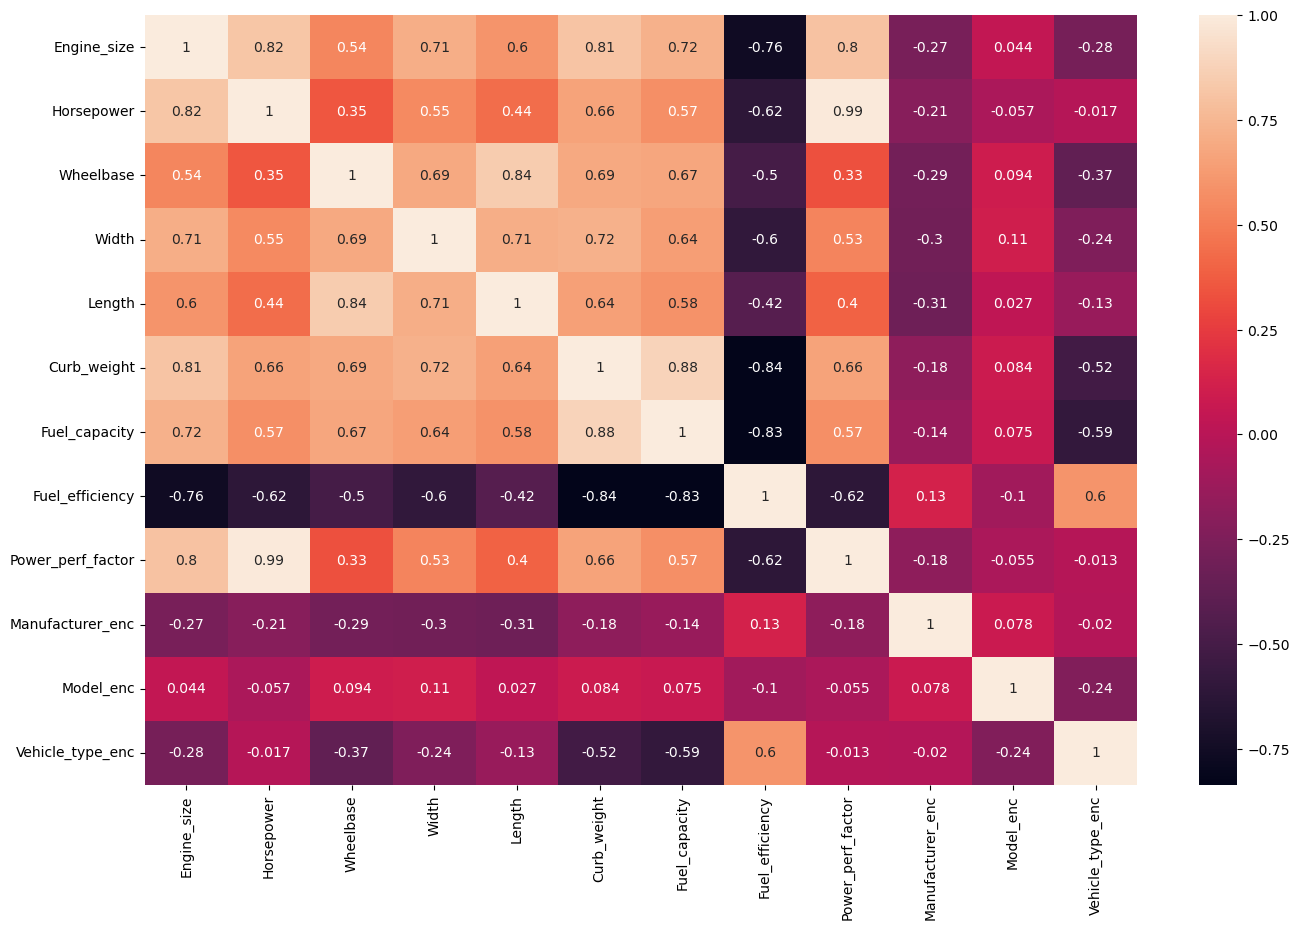

In [93]:
fig,ax=plt.subplots(1,1,figsize=(16,10))
ax=sns.heatmap(df_scaled.iloc[:,:-1].corr(),annot=True)
plt.show()

# Power_perf_factor and Horsepower has highest correlation (0.99)

# 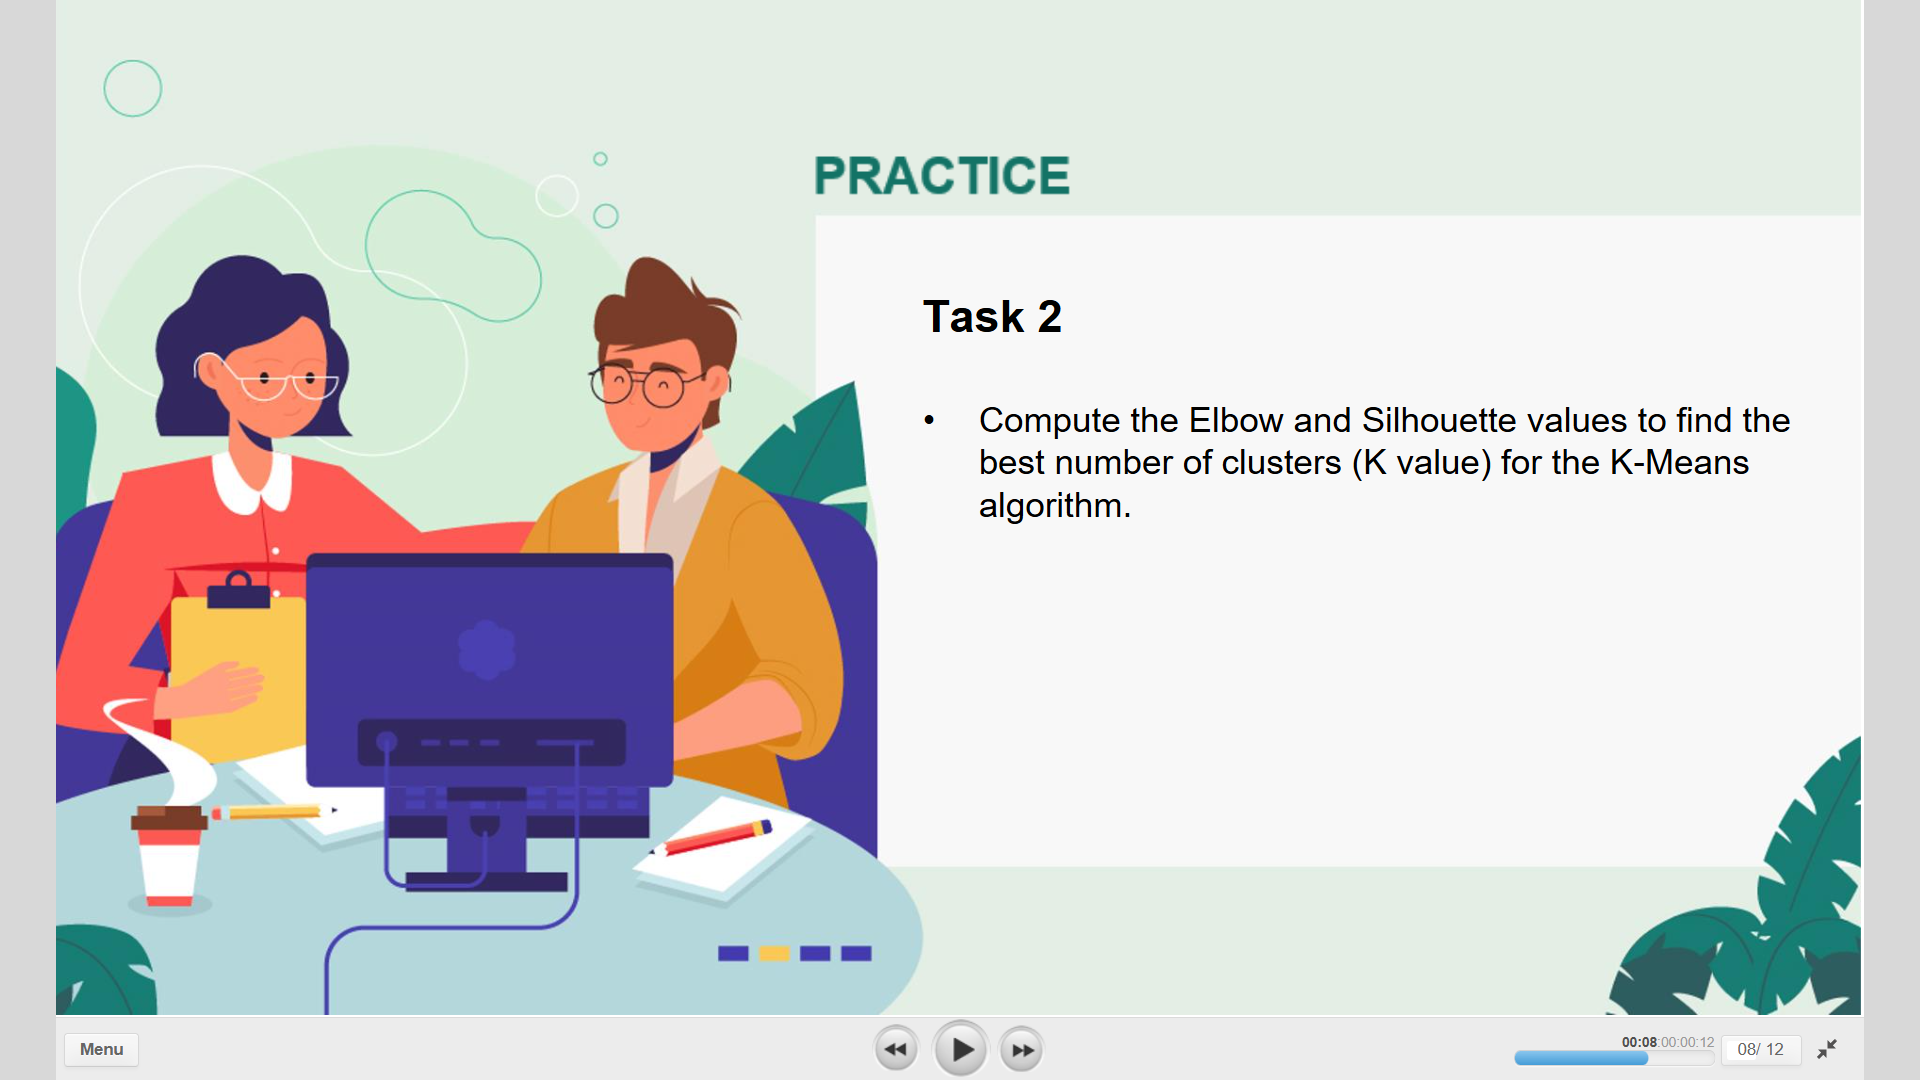

In [96]:
# df_scaled
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

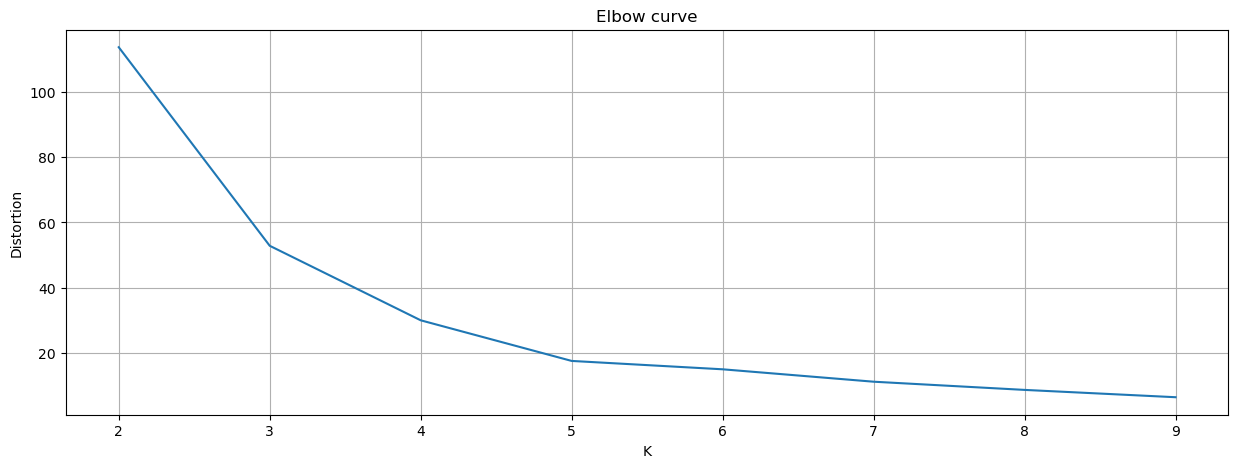

In [97]:
distortion=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    x=np.array(df_scaled[['Power_perf_factor','Horsepower']])
    kmeans.fit(x)
    distortion.append(kmeans.inertia_)
fig=plt.figure(figsize=(15,5))
plt.plot(range(2,10),distortion)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()

# k=5

for n clusters 2 The avg silhouete_score is: 0.5523382436672114
for n clusters 3 The avg silhouete_score is: 0.5526467145864487
for n clusters 4 The avg silhouete_score is: 0.5206790575919813
for n clusters 5 The avg silhouete_score is: 0.5651089135352513
for n clusters 6 The avg silhouete_score is: 0.5382079878550463
for n clusters 7 The avg silhouete_score is: 0.5376383237770863
for n clusters 8 The avg silhouete_score is: 0.5465616477698898
for n clusters 9 The avg silhouete_score is: 0.5459131173188365


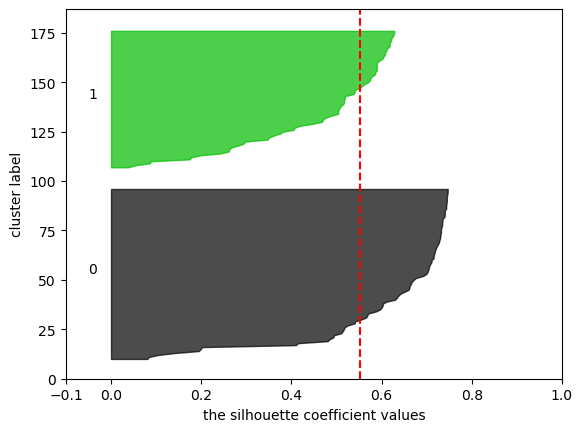

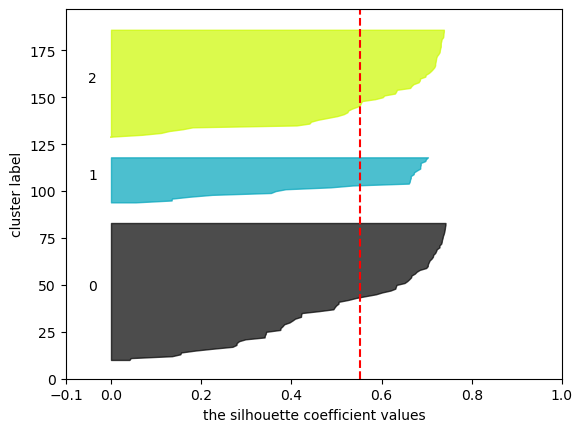

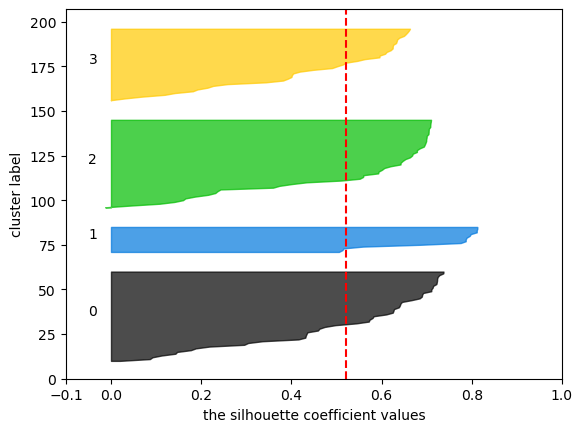

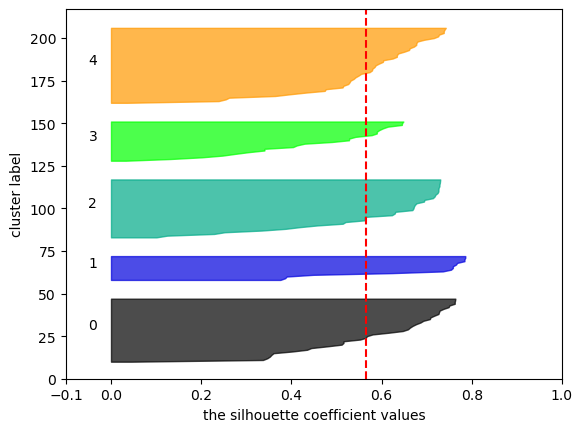

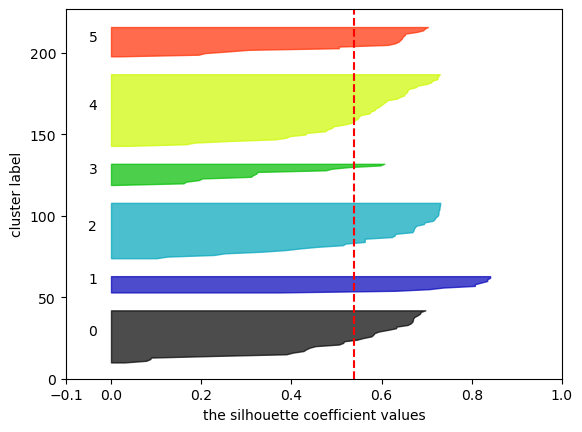

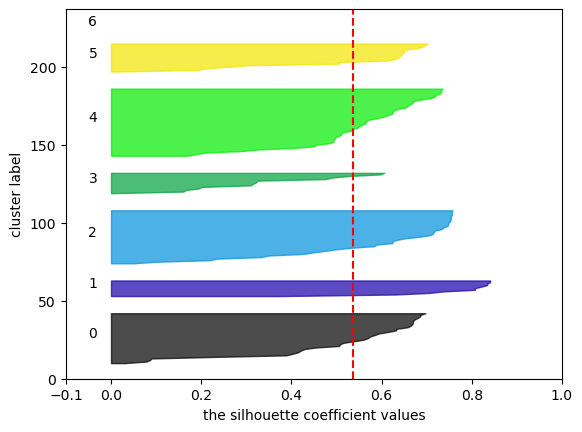

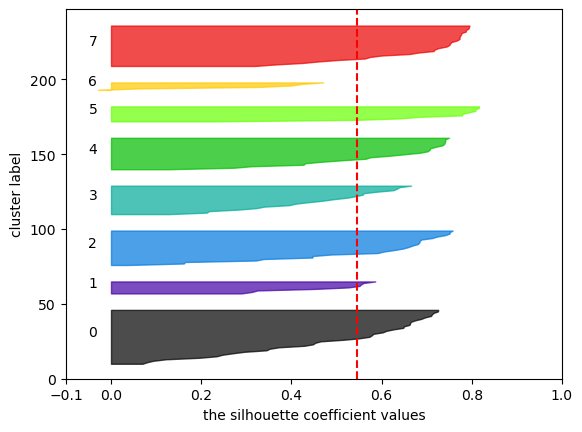

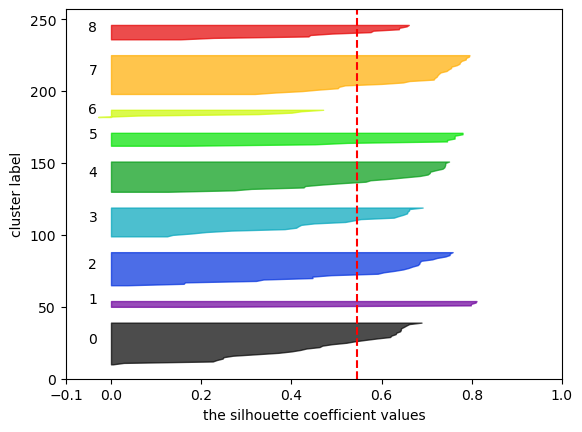

In [99]:
import matplotlib.cm as cm
import numpy as np
range_n_clusters=[2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    fig,ax1=plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    x=np.array(df_scaled[['Power_perf_factor','Horsepower']])
    ax1.set_ylim([0,len(x)+(n_clusters+1)*10])
    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=clusterer.fit_predict(x)
    silhouette_avg=silhouette_score(x,cluster_labels)
    print('for n clusters',n_clusters,'The avg silhouete_score is:',silhouette_avg)
    sample_silhouete_values=silhouette_samples(x,cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouete_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        y_lower=y_upper+10
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
plt.show()

# k=5

# 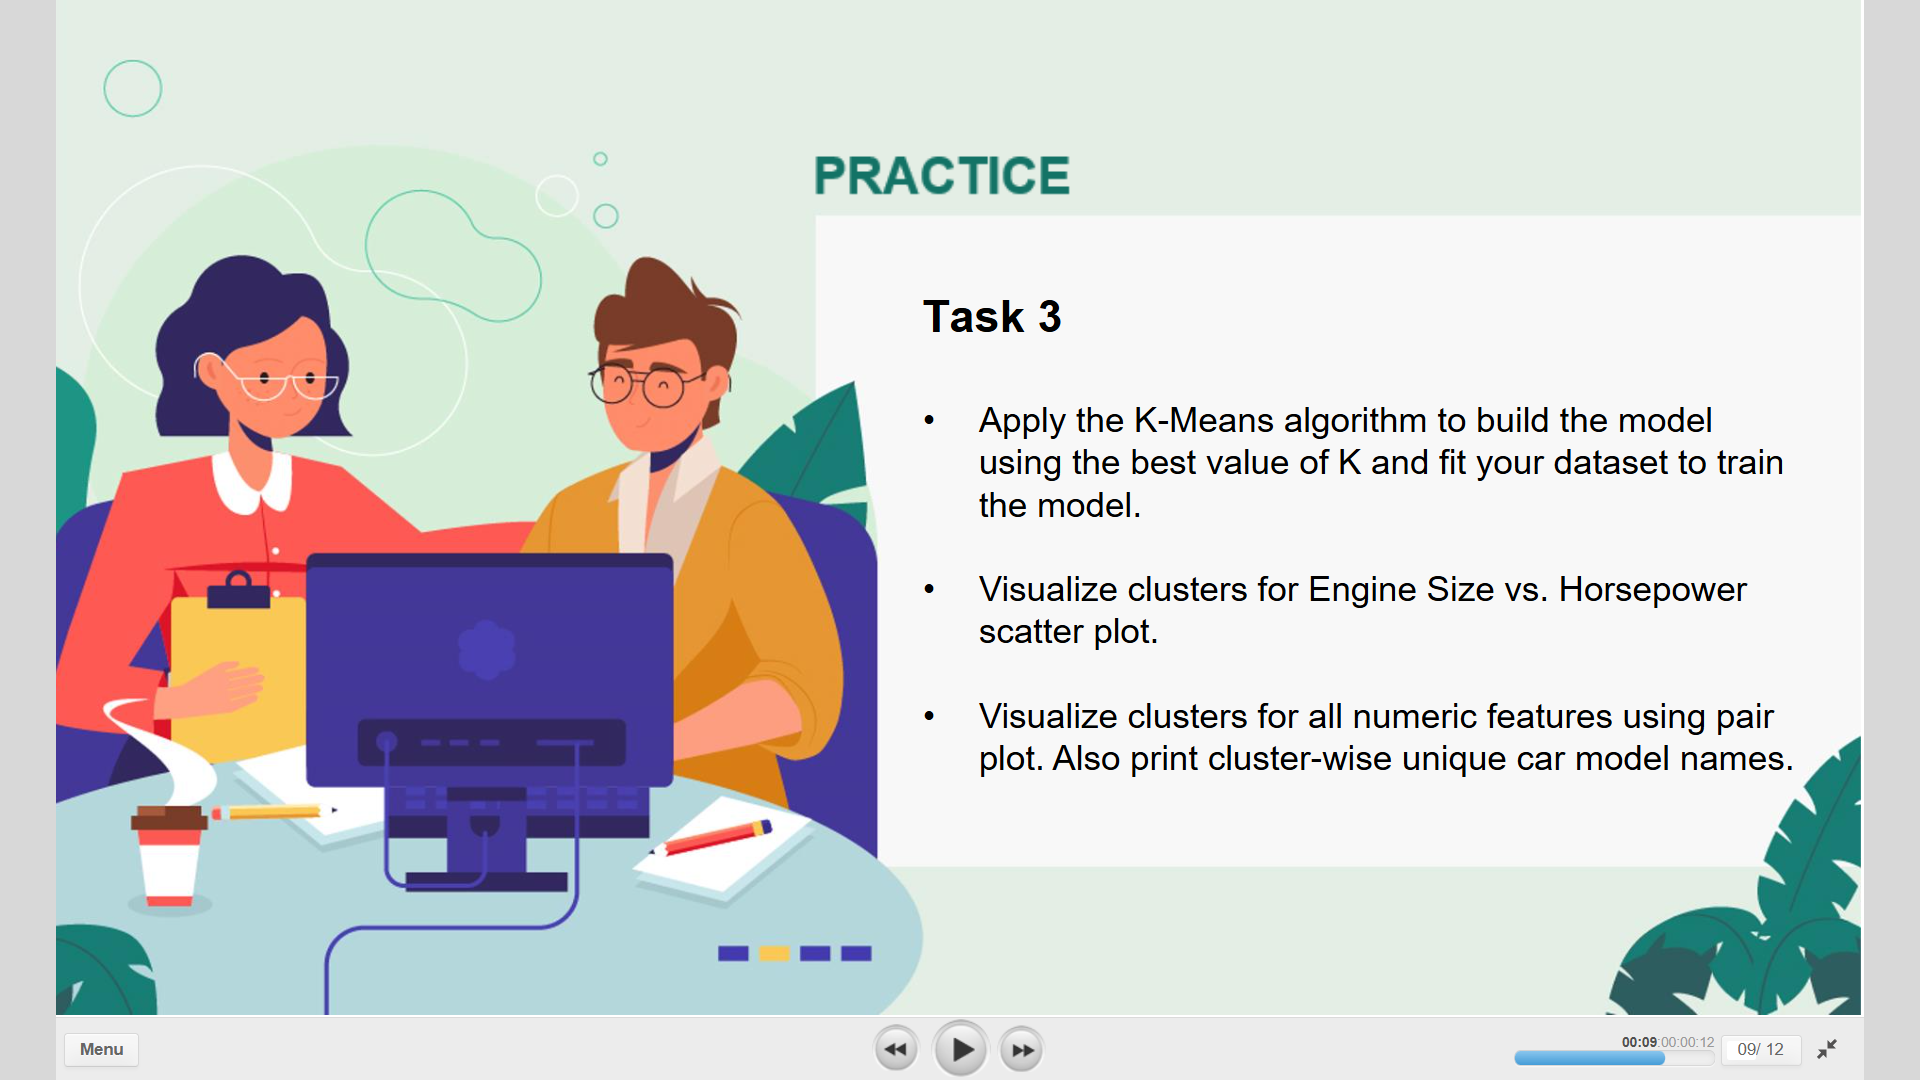

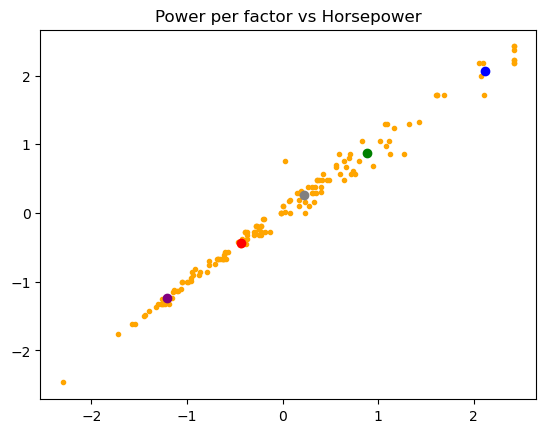

In [102]:
# create model
Kmeans_model_5=KMeans(n_clusters=5)
# fiting the model

Kmeans_model_5.fit(x)
# find the centeroid for five clusters
cluster_centeroid_5=Kmeans_model_5.cluster_centers_
#creatingg labels of clusters
labels_5=Kmeans_model_5.labels_
#vizualizing
x=np.array(df_scaled[['Power_perf_factor','Horsepower']])
plt.scatter(x[:,0],x[:,1],marker='.',c='orange')
plt.scatter(0.88400197,  0.87402996,c='green')
plt.scatter(-0.4392677 , -0.43306798,c='red')
plt.scatter(2.11673641,  2.06538603,c='blue')
plt.scatter(-1.21136439, -1.23700177 ,c='purple')
plt.scatter(0.22469473,  0.26896166,c='grey')
plt.title('Power per factor vs Horsepower')
plt.show()

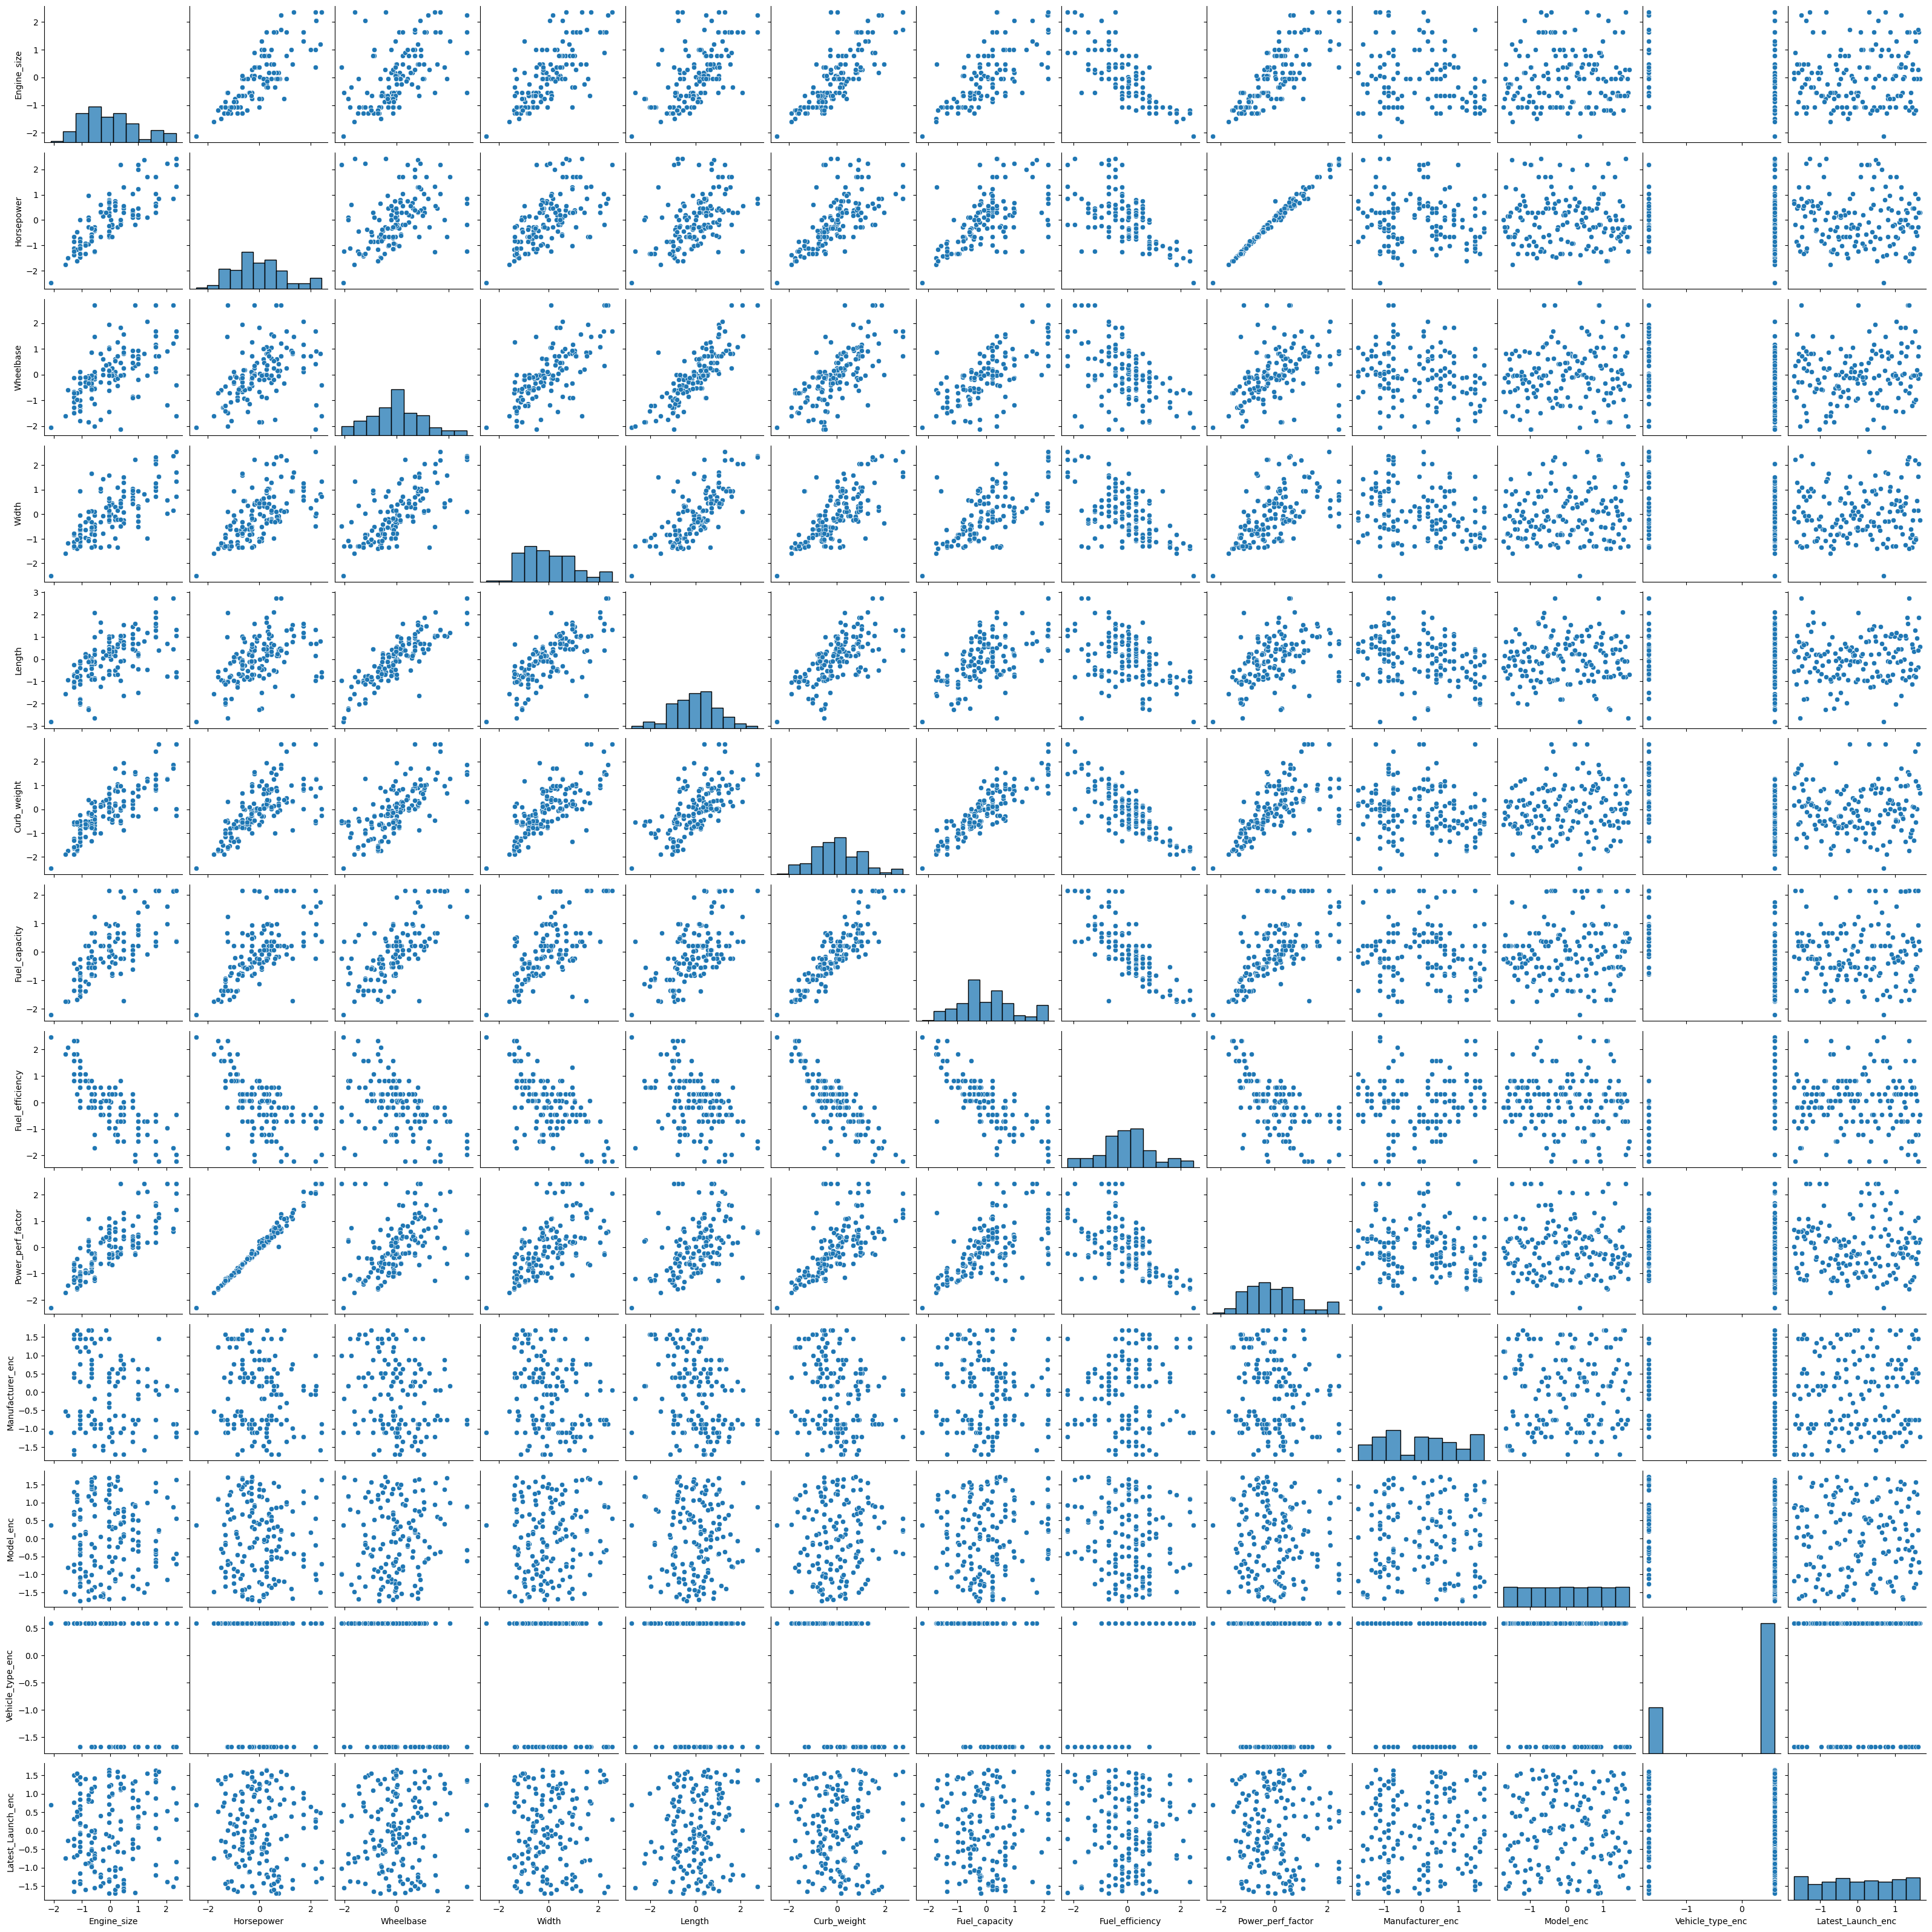

In [103]:
sns.pairplot(df_scaled)
plt.show()

In [104]:
df_info=pd.concat([df_scaled,pv['Model']],axis=1)
df_info

Engine_size  Horsepower  Wheelbase     Width    Length  Curb_weight  \
0      -1.286724   -0.852221  -0.878521 -1.122510 -1.121607    -1.226153   
1       0.168414    0.762340   0.117309 -0.247827  0.417403     0.250315   
2       0.168414    0.762340  -0.055879 -0.160359  0.349837     0.171279   
3       0.480229    0.477418   1.055409  0.072890  0.695176     0.810297   
4      -1.286724   -0.662272  -0.676468 -0.860105 -0.701195    -0.622449   
..           ...         ...        ...       ...       ...          ...   
152    -1.182785   -0.472324  -0.979547 -1.035041 -0.806298    -0.548457   
153    -0.663093   -0.320365  -0.344525 -0.539388 -0.108113    -0.269307   
154    -0.663093   -0.320365  -0.344525 -0.539388 -0.085590    -0.183544   
155    -0.767032    0.971284  -0.344525  0.102046 -0.123127     0.391572   
156    -0.143401    0.306464   0.377090  0.276983  0.184675     0.389890   

     Fuel_capacity  Fuel_efficiency  Power_perf_factor  Manufacturer_enc  \
0        -1.351619         1.070331          -0.786032         -1.694221   
1        -0.170495         0.311068           0.643092         -1.694221   
2        -0.170495         0.564156           0.024327         -1.694221   
3         0.065729        -0.448195           0.643913         -1.694221   
4        -0.406720         0.817243          -0.591793         -1.577506   
..             ...              ...                ...               ...   
152      -0.583889         0.311068          -0.431083          1.690504   
153       0.036201         0.311068          -0.251606          1.690504   
154       0.036201         0.311068          -0.229948          1.690504   
155       0.213370        -0.195107           1.085883          1.690504   
156       0.981100         0.057980           0.399722          1.690504   

     Model_enc  Vehicle_type_enc  Latest_Launch_enc    Model  
0     0.029623          0.594515          -1.646086  Integra  
1     1.453800          0.594515          -1.229967       TL  
2    -1.172026          0.594515          -1.698100       CL  
3     0.830723          0.594515          -1.464034       RL  
4    -1.550323          0.594515          -0.397731       A4  
..         ...               ...                ...      ...  
152   1.565064          0.594515           1.552824      V40  
153   1.053250          0.594515          -0.007620      S70  
154   1.587317          0.594515           1.136705      V70  
155  -1.194279          0.594515           0.850624      C70  
156   1.075503          0.594515          -0.085642      S80  

[157 rows x 14 columns]

In [141]:
print(df_info['Model'].unique())

['Integra' 'TL' 'CL' 'RL' 'A4' 'A6' 'A8' '323i' '328i' '528i' 'Century'
 'Regal' 'Park Avenue' 'LeSabre' 'DeVille' 'Seville' 'Eldorado' 'Catera'
 'Escalade' 'Cavalier' 'Malibu' 'Lumina' 'Monte Carlo' 'Camaro' 'Corvette'
 'Prizm' 'Metro' 'Impala' 'Sebring Coupe' 'Sebring Conv.' 'Concorde'
 'Cirrus' 'LHS' 'Town & Country' '300M' 'Neon' 'Avenger' 'Stratus'
 'Intrepid' 'Viper' 'Ram Pickup' 'Ram Wagon' 'Ram Van' 'Dakota' 'Durango'
 'Caravan' 'Escort' 'Mustang' 'Contour' 'Taurus' 'Focus' 'Crown Victoria'
 'Explorer' 'Windstar' 'Expedition' 'Ranger' 'F-Series' 'Civic' 'Accord'
 'CR-V' 'Passport' 'Odyssey' 'Accent' 'Elantra' 'Sonata' 'I30' 'S-Type'
 'Wrangler' 'Cherokee' 'Grand Cherokee' 'ES300' 'GS300' 'GS400' 'LS400'
 'LX470' 'RX300' 'Continental' 'Town car' 'Navigator' 'Mirage' 'Eclipse'
 'Galant' 'Diamante' '3000GT' 'Montero' 'Montero Sport' 'Mystique'
 'Cougar' 'Sable' 'Grand Marquis' 'Mountaineer' 'Villager' 'C-Class'
 'E-Class' 'S-Class' 'SL-Class' 'SLK' 'SLK230' 'CLK Coupe' 'CL500'
 'M

# 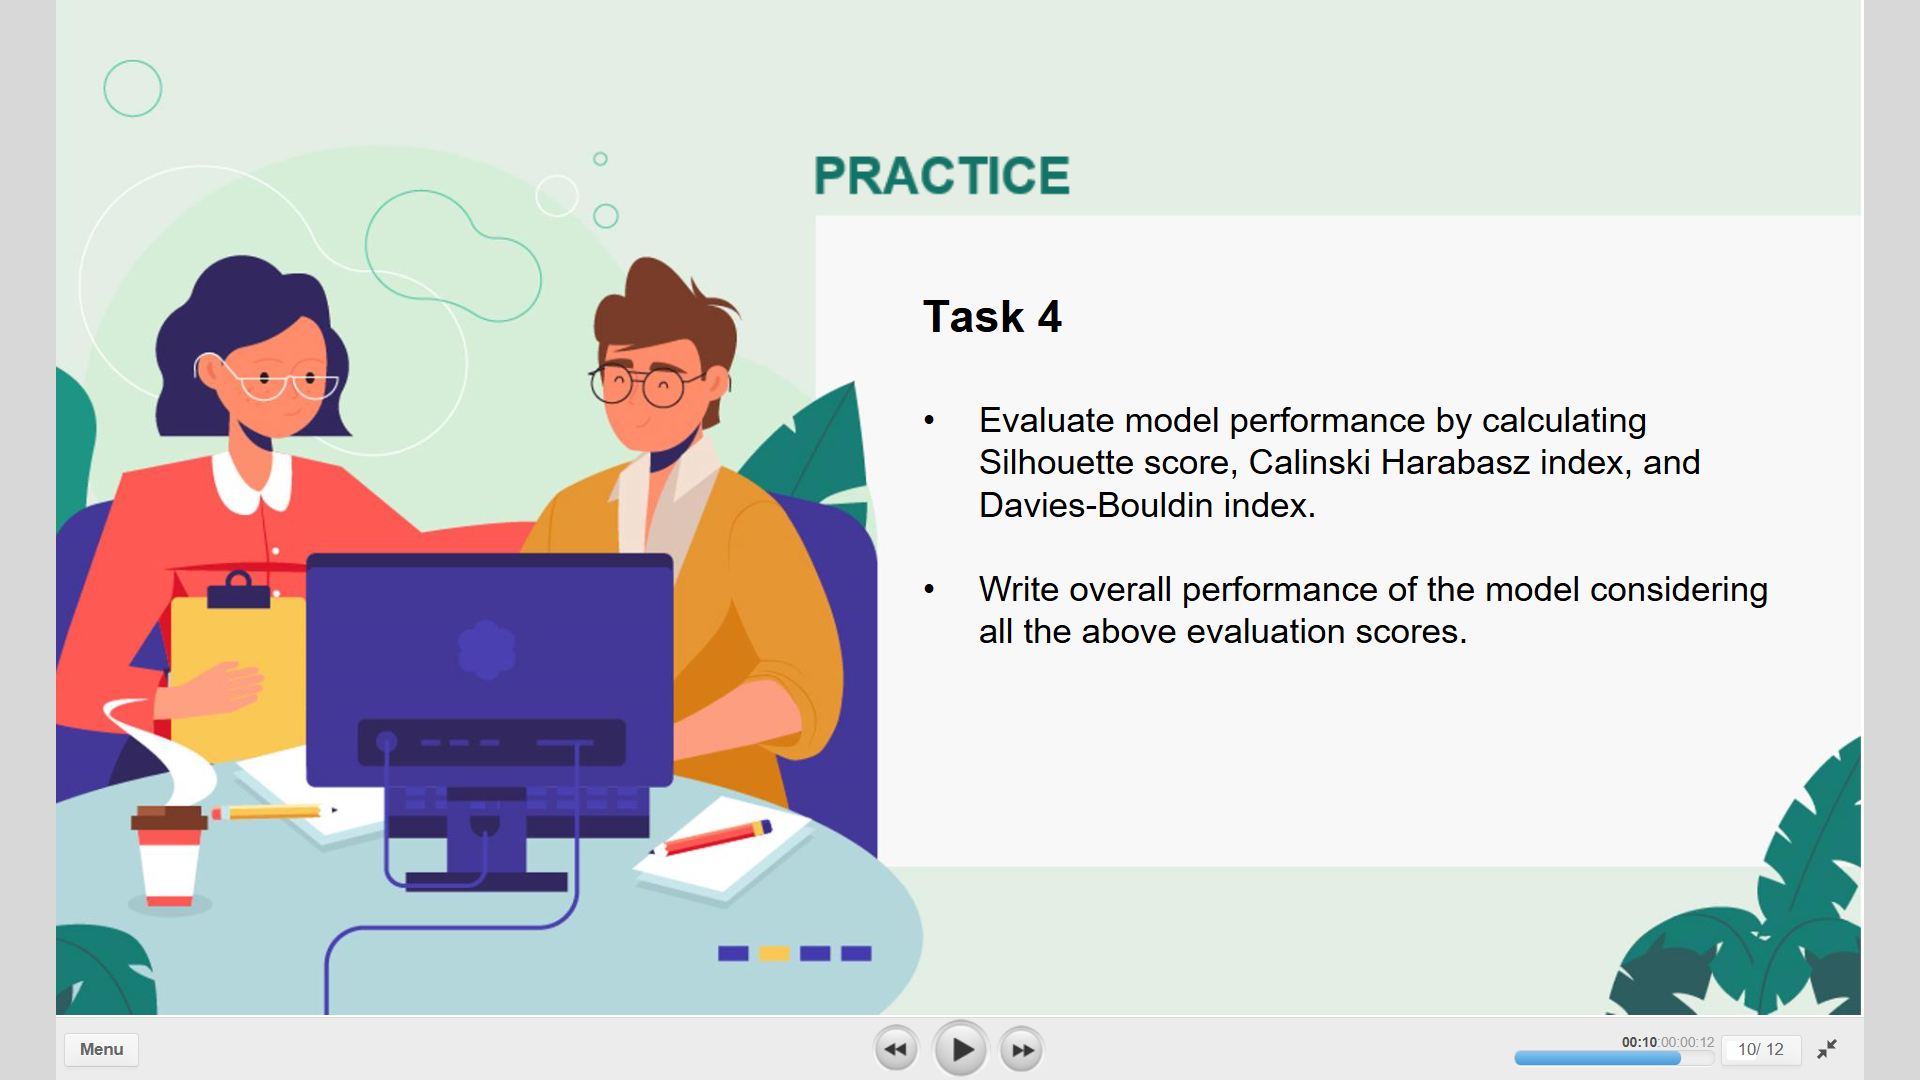

# silhouete score

In [152]:
from sklearn.metrics import silhouette_score
silhouette_avg=round(silhouette_score(x,labels_5),2)
print('The silhouete score is',silhouette_avg)

The silhouete score is 0.52


# a silhouete score of 0.52 suggest that the moderate clustering quality with some potential overlaps.

# Davies-Bouldin index

In [156]:
from sklearn.metrics import davies_bouldin_score
db_score=round(davies_bouldin_score(x,labels_5),2)
print('The Davies-Bouldin  score is',db_score)
               

The Davies-Bouldin  score is 0.56


# a low Davies-Bouldin  score of 0.56 show that low score confirma that the clusters are compact and well seperated.

# CHI (Calinski-Harabasz Index)

In [162]:
from sklearn.metrics import calinski_harabasz_score
chi_index=round(calinski_harabasz_score(x,labels_5),2)
print('The Calinski-Harabasz score is',chi_index)

The Calinski-Harabasz score is 457.74


# the chi score  of 457 .74 says it is decent clustering  .not poor nor very well seperated it is decent enough.

# overall the clustering is decent enough not excelent but good enough.